In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner
import copy
import pickle
from astropy.io import ascii

%matplotlib inline

## Definitions of fields can be found at:

## confirmed planets:
#### https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html

## KOIs:
#### https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [2]:
KOIs = ascii.read("../../../KOIs_chen2018_goodSystems.csv")
print(KOIs)
print(len(KOIs.colnames))

 kepid   kepoi_name  kepler_name  ...   koi_pmass_err1     koi_pmass_err2  
-------- ---------- ------------- ... ------------------ ------------------
 1026957  K00958.01            -- ...  5.769464972554899  3.244408578305821
 1161345  K00984.01            -- ...  6.326092545818279 3.5574232654922424
 1429589  K04923.01            -- ... 1.5735103860765358 0.7378008287493754
 1431122  K00994.01            -- ...  2.419108737036141 1.0891220900035181
 1432789  K00992.01  Kepler-745 b ...  5.964185807741979  3.027858259246558
 1432789  K00992.02            -- ...  2.437079035986733 1.0697247065679856
 1717722  K03145.01            -- ... 2.6787928971009194 1.3399128949332408
 1717722  K03145.02            -- ... 1.3217080679402717 0.6511151044108447
 1718189  K00993.03            -- ... 3.0588005877402042 1.4588377614817154
 1718189  K00993.02  Kepler-262 b ... 2.9891737858212397  1.378072373671277
     ...        ...           ... ...                ...                ...
12645057  K0

In [3]:
print(len(np.array(KOIs['kepid'])))
print(len(np.unique(np.array(KOIs['kepid']))))

3524
2662


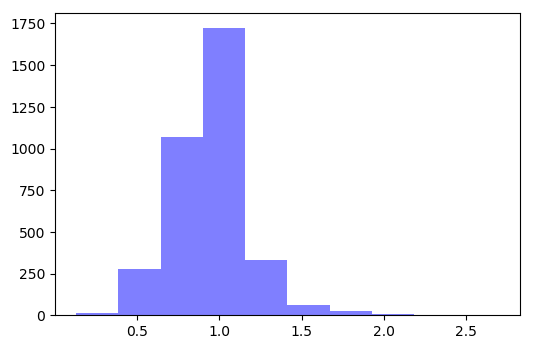

0.132
2.697


In [10]:
plt.hist(KOIs['koi_smass'],color='b',alpha=0.5)
plt.show()

print(np.min(KOIs['koi_smass']))
print(np.max(KOIs['koi_smass']))

## Want these in a format:
### each row = 1 planetary system, i.e. a list of "planets"
### each "planet" = an array of ((Teff, logg, [Fe/H], Rp/Rstar, P))


In [4]:
systems = []

idxs = np.arange(len(KOIs['kepid']))
kepids = np.array(KOIs['kepid'])
unique_kepid = np.unique(np.array(KOIs['kepid']))
print(len(unique_kepid))

for ID in unique_kepid:
    goodSystem = True
    system = []
    thisSystem_mask = (kepids == ID)
    thisSystem_idxs = idxs[thisSystem_mask]
    
    if len(thisSystem_idxs) > 1:
        kepNames = KOIs['kepoi_name'][thisSystem_idxs]
        Ps = KOIs['koi_period'][thisSystem_idxs]
        #sort KOIs from inner to outer
        sort = np.argsort(Ps)
        thisSystem_idxs = thisSystem_idxs[sort]

        count = KOIs['koi_count'][thisSystem_idxs[0]]

        Teff = KOIs['koi_steff'][thisSystem_idxs[0]]
        logg = KOIs['koi_slogg'][thisSystem_idxs[0]]
        met = KOIs['koi_smet'][thisSystem_idxs[0]]

        if np.any(np.isnan(np.array((Teff,logg,met)))):
            print("star nan!")
            print(ID)
            pass

        else:
            for j in range(1,count+1):
                planet = [Teff, logg, met]
                planet.append(KOIs['koi_ror'][thisSystem_idxs[j-1]])
                planet.append(KOIs['koi_period'][thisSystem_idxs[j-1]])
                if np.any(np.isnan(np.array((planet)))):
                    print("planet nan!")
                    print(ID)
                    goodSystem = False
                    pass
                else:
                    system.append((planet))

            if goodSystem is True:
                systems.append(system)

print(len(systems))

print(type(systems))
print(type(systems[0]))
print(type(systems[0][0]))

with open("planet-mmi-trainingset_noSingles.txt", "wb") as picklefile:
    pickle.dump(systems, picklefile)

2662


/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: Warning: converting a masked element to nan.


star nan!
5526717
star nan!
8223568
star nan!
10005788
planet nan!
11336883
578
<type 'list'>
<type 'list'>
<type 'list'>


/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: UserWarning: Warning: converting a masked element to nan.


In [5]:
with open("planet-mmi-trainingset_noSingles.txt", "rb") as picklefile:
    systest = pickle.load(picklefile)

print(len(systest))
print(type(systest))
print(type(systest[0]))
print(type(systest[0][0]))
print(systest[0:2])
print(systems[0:2])


578
<type 'list'>
<type 'list'>
<type 'list'>
[[[5782.0, 4.28, 0.16, 0.010812, 4.57834367], [5782.0, 4.28, 0.16, 0.018094, 9.93146307]], [[4805.0, 4.633, -0.06, 0.014052, 0.977311489], [4805.0, 4.633, -0.06, 0.022053, 4.53702121]]]
[[[5782.0, 4.28, 0.16, 0.010812, 4.57834367], [5782.0, 4.28, 0.16, 0.018094, 9.93146307]], [[4805.0, 4.633, -0.06, 0.014052, 0.977311489], [4805.0, 4.633, -0.06, 0.022053, 4.53702121]]]
